In [1]:
## Importing the required libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

np.random.seed(10)

iris = datasets.load_iris() ## Importing the dataset

In [2]:
Data = np.concatenate((iris.data, iris.target[:,None]), axis=1)

# Shuffling the data 
np.random.shuffle(Data)

## Slicing the Dataset as required for labels 
X = Data[:,:4]
yy = Data[:,4]
 
## Scaling the data to make gradient descent work smoothly

X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [3]:
## Data is already cleaned so no need of preprocessing
X_train = X[:100,:]
X_val = X[100:130,:]
X_test = X[130:150,:]

yy_train = yy[:100]
yy_val = yy[100:130]
yy_test = yy[130:150]


In [4]:
## Linear regression Using the least square method 

def lin_reg(X, yy, alpha):
    k = len(X[1])
    yy = np.concatenate((yy, np.zeros(k))) 
    z_k = np.sqrt(alpha) * np.eye(k)
    X = np.vstack((X,z_k))  
    
    b = np.concatenate((np.ones(len(X)-k), np.zeros(k)))[:,None]

    X = np.insert(X,[0],b,axis=1)

    w_fit=np.linalg.lstsq(X, yy, rcond=None)[0]
    
    
    return w_fit[1:], w_fit[0] 
    

In [5]:

alpha = 1 ## value for lambda parameter

## Extracting the required parameters
ww0, bb0 = lin_reg(X_train, yy_train, alpha)

print("Bias is:",bb0)
print("Weights are:","\n",ww0)

Bias is: -0.02385942299664876
Weights are: 
 [ 0.22334537 -0.26152559  0.92774672  1.30104487]


In [6]:
## Cost functions

## Mean Square error cost function
def mse(pred,yy):
    return np.mean((pred-yy)**2)

## mLogloss for multi-classification
def mlogloss(pred, yy):
    yy = np.int_(yy)
    return -np.mean(np.log(pred[np.arange(len(yy)), yy]))

In [7]:
## for least square method
pred1_train = np.dot(X_train,ww0)+bb0
pred2_val = np.dot(X_val,ww0)+bb0
print("Means square for training set(using least square method):",mse(pred1_train, yy_train))
print("Means square for validation set(using least square method):",mse(pred2_val, yy_val))

Means square for training set(using least square method): 0.05145419928189548
Means square for validation set(using least square method): 0.06793670471653827


In [8]:
## Defining the softmax function
def softmax(x):
    
    # subtracting the max of z for numerical stability.
    res = np.exp(x - np.max(x))
    
    # Calculating softmax for all examples.
    for i in range(len(x)):
        res[i] /= np.sum(res[i])
        
    return res

## Defining one-hot encoder
def one_hot(yy, c):
    yy = np.int_(yy)
    yy_hot = np.zeros((len(yy), c))
    yy_hot[np.arange(len(yy)), yy] = 1

    return yy_hot




## Simple gradient descent method for linear regression

def grad_des(X_train, yy_train, learning_rate, epochs):
    n=len(X_train)
    ww = np.random.randn(len(X[1]))
    bb = 0

    for i in range(epochs):
        yy_pred = np.dot(X_train, ww)+bb
        
        
        cost = mse(yy_pred, yy_train)
        if i%100==0:
            print("MSE(train) for {0}th epoch is {1}".format(i, cost))
        D_ww = -2/n * np.sum(np.transpose(X_train) * (yy_train-yy_pred)) 
        D_bb = -2/n * np.sum((yy_train-yy_pred))
        
        ## Updating the parameters
        ww -=learning_rate*D_ww
        bb -=learning_rate*D_bb
        
        ## plotting the cost w.r.t to each iteration
        plt.scatter(i, cost)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        
## Gradient descent for softmax algorithm
def grad_des_multi(X_train, yy_train, C, learning_rate, epochs):
    N, M = X_train.shape
    ww = np.random.randn(M,C)
    bb = np.random.randn(C)
    cost =[]
    for i in range(epochs):
        yy_pred = softmax(np.dot(X_train, ww)+bb)
        
        yy_hot = one_hot(yy_train, C)
        
        ## Gradient of mlog-loss w.r.t ww and bb
        D_ww = (1/N) * np.dot(np.transpose(X_train),(yy_pred - yy_hot))
        D_bb = (1/N) * np.sum(yy_pred - yy_hot)
        
        ## Updating the parameters
        
        ww = ww - learning_rate * D_ww
        bb = bb - learning_rate * D_bb
        

        loss = mlogloss(yy_pred, yy_train)
        cost.append(loss)
        if i%1000==0:
            print("loss for {0}th epoch => {1}".format(i, loss))
        plt.scatter(i, loss)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
    return cost, ww, bb
        
    

loss for 0th epoch is 1.0947858881917854
loss for 1000th epoch is 0.4000082801087101
loss for 2000th epoch is 0.37914612073876214
loss for 3000th epoch is 0.37135191810238916
loss for 4000th epoch is 0.3677567586737679
loss for 5000th epoch is 0.36586837265514577
loss for 6000th epoch is 0.36476882790306675
loss for 7000th epoch is 0.3640675299819318
loss for 8000th epoch is 0.36358181475955315
loss for 9000th epoch is 0.3632201909617629


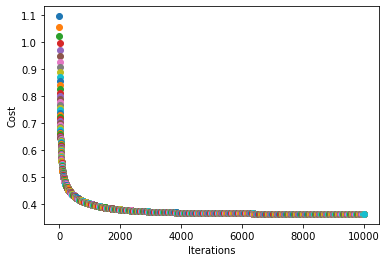

In [9]:
## Total no of iteration to do
epochs = 10000

#grad_des(X_train, yy_train, 0.1, epochs)

C = 3   ## No. of classes

## Extracting the required parameters 
cost, ww, bb = grad_des_multi(X_train, yy_train, C, 0.9, epochs)





In [10]:
## Making predictions using the weights and bias found
def predict_class(X, ww, bb):
    return np.argmax(softmax(np.dot(X, ww)+ bb), axis=1)



## Prediction for train, validation and test Data
predc_train = predict_class(X_train, ww, bb)
predc_val = predict_class(X_val, ww, bb)
predc_test = predict_class(X_test, ww, bb)



## Getting the accuracy of the model
def accuracy(yy_pred, yy):
    return 100*np.sum(yy_pred==yy)/len(yy)



In [11]:
print("Accuracy on Train Data is: {0}%".format(accuracy(predc_train, yy_train)))
print("Accuracy on Validation Data is: {0}%".format(accuracy(predc_val, yy_val)))
print("Accuracy on Test Data is: {0}%".format(accuracy(predc_test, yy_test)))

Accuracy on Train Data is: 84.0%
Accuracy on Validation Data is: 80.0%
Accuracy on Test Data is: 80.0%


In [12]:
## Softamx regression using inbuilt functions

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## Fitting the model to inbuilt functions
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
softReg.fit(X_train, yy_train)

## Making predictions using softreg.predict
y_pred_train = softReg.predict(X_train)
y_pred_val = softReg.predict(X_val)
y_pred_test = softReg.predict(X_test)

print("Accuracy on Test Data is: {0}%".format(100*np.sum(y_pred_train==yy_train)/len(yy_train)))
print("Accuracy on Validation Data is: {0}%".format(100*np.sum(y_pred_val==yy_val)/len(yy_val)))
print("Accuracy on Test Data is: {0}%".format(100*np.sum(y_pred_test==yy_test)/len(yy_test)))

Accuracy on Test Data is: 93.0%
Accuracy on Validation Data is: 90.0%
Accuracy on Test Data is: 100.0%


In [36]:
## Building a two layer Neural Network for better performance

## Defining RELU to add non-linearity
def relu(x):
    x = np.int_(x)
    return np.maximum(0,x)

## Defining the derivative of relu
def D_relu(a):
    return a>0

## Defining function to get predictions
def predict_classNN(A2):
    return np.argmax(A2, axis=1)

## defining the values for initial parameters
def initial_params():
    ww1 = np.random.randn(len(X_train[1]), 20)
    bb1 = np.random.randn(20)
    
    ww2 = np.random.randn(20, 3)
    bb2 = np.random.randn(3)
    
    return  ww1, bb1, ww2, bb2


## Function to do Forward propagation
def forward_prop(X, ww1, ww2, bb1, bb2, pred= False):
    h1 = np.dot(X, ww1)+ bb1
    A1 = relu(h1)
    h2 = np.dot(h1, ww2)+ bb2
    A2 = softmax(h2)
    if pred:
        return A2
    return h1, h2, A1, A2

## Function to do Backward propagation
def backward_prop(X, yy, h1, h2, A1, A2, ww2):
    N = len(yy)
    yy = one_hot(yy, 3)
    dA2 = A2 - yy
    dww2 = 1/N * np.dot(np.transpose(h1), dA2)
    dbb2 = 1/N * np.sum(dA2)
    dA1 = np.dot(dA2, np.transpose(ww2)) * D_relu(A1)
    dww1 = 1/N * np.dot(np.transpose(X), dA1)
    dbb1 = 1/N * np.sum(dA1)
    
    return dww1, dww2, dbb1, dbb2

## Updating the parameters after doing backward prop
def update_param(ww1, ww2, bb1, bb2, dww1, dww2, dbb1, dbb2, step_size):
    ww1 = ww1 - step_size* dww1
    ww2 = ww2 - step_size* dww2
    
    bb1 = bb1 - step_size* dbb1
    bb2 = bb2 - step_size* dbb2
    
    return ww1, ww2, bb1, bb2

def gradient_desc_nn(X, yy, ww1, bb1, ww2, bb2, epochs, step_size, pred):
    
    for i in range(epochs):
        h1, h2, A1, A2 = forward_prop(X, ww1, ww2, bb1, bb2)

        dww1, dww2, dbb1, dbb2 = backward_prop(X, yy, h1, h2, A1, A2, ww2)
        ww1, ww2, bb1, bb2 = update_param(ww1, ww2, bb1, bb2, dww1, dww2, dbb1, dbb2, step_size)
        
        
        if i%1000==0:
            print("Accuracy for {0}th epoch => {1}".format(i, accuracy(predict_classNN(A2), yy)))
    
    return ww1, ww2, bb1, bb2    
        
ww1, bb1, ww2, bb2 = initial_params() 
ww1, ww2, bb1, bb2 = gradient_desc_nn(X_train, yy_train, ww1, bb1, ww2, bb2, 10000, 0.1, True)    



Accuracy for 0th epoch => 40.0
Accuracy for 1000th epoch => 98.0
Accuracy for 2000th epoch => 97.0
Accuracy for 3000th epoch => 98.0
Accuracy for 4000th epoch => 98.0
Accuracy for 5000th epoch => 98.0
Accuracy for 6000th epoch => 98.0
Accuracy for 7000th epoch => 98.0
Accuracy for 8000th epoch => 98.0
Accuracy for 9000th epoch => 98.0


In [37]:
## getting predictions for validation and test set for fitted NN
pred_valnn = predict_classNN(forward_prop(X_val, ww1, ww2, bb1, bb2, True))
pred_testnn = predict_classNN(forward_prop(X_test, ww1, ww2, bb1, bb2, True))


print("Accuracy on Validation Data is: {0}%".format(accuracy(pred_valnn, yy_val)))
print("Accuracy on Test Data is: {0}%".format(accuracy(pred_testnn, yy_test)))

Accuracy on Validation Data is: 100.0%
Accuracy on Test Data is: 100.0%
